In [27]:
import os, sys, pickle

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
import scipy, math
from scipy import stats
import jp_mpl as jplot

import ntuple_tools


In [28]:
basedir = '/home/jpyanez/scratch/snoplus/precuts'

In [33]:
var_names =['qpdtProbability',
            'qpdtNhitsEarly',
            'nhitsCleaned',
            'itr',
            'energy',
            'qpdtQMax',
            'beta14',
            'posr']

In [39]:
# All proton decay
all_decay_type = 'all_pdecay'
indir = basedir +'/'+all_decay_type+'_npy'
all_decay={}
for one_var in var_names:
    all_decay[one_var] = np.load(os.path.join(indir, one_var+'.npy'))
all_decay_tcp = 1-(1-all_decay['qpdtProbability'])**all_decay['qpdtNhitsEarly']
all_decay_sitr = (0.74-all_decay['itr'])*np.sqrt(all_decay['nhitsCleaned'])/0.43

Diagnostics qpdtProbability
-0.000913546354421 1.0 0.721539379708
Diagnostics qpdtNhitsEarly
0.0 29.0 0.639137369214
Diagnostics nhitsCleaned
15.0 133.0 40.9219309771
Diagnostics itr
0.0909090909091 1.0 0.744389152682
Diagnostics energy
2.90740459626 119.134720644 5.47424281241
Diagnostics beta14
-0.253300229837 4.42005000232 0.431942712799
Diagnostics posr
35.8650943302 7999.60713229 4522.22528003


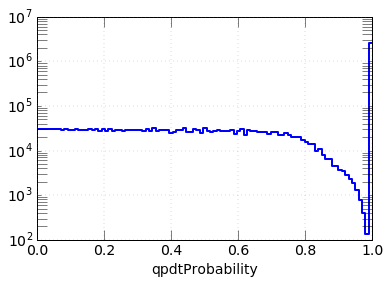

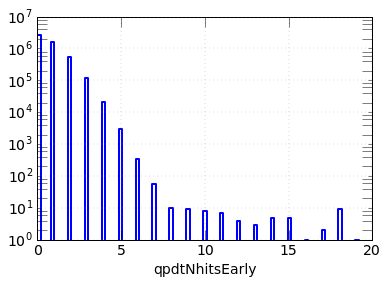

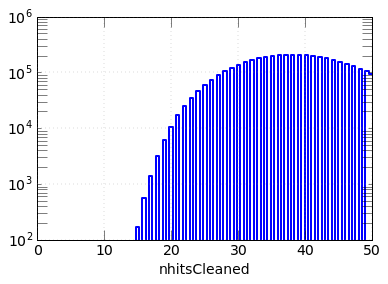

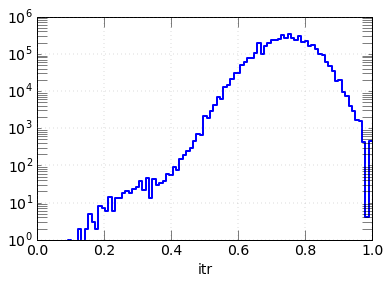

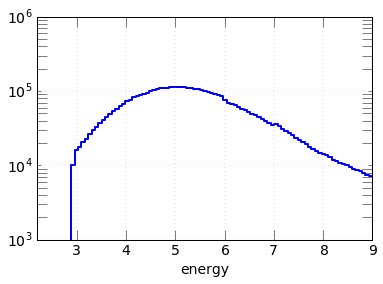

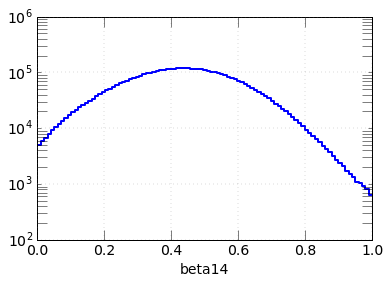

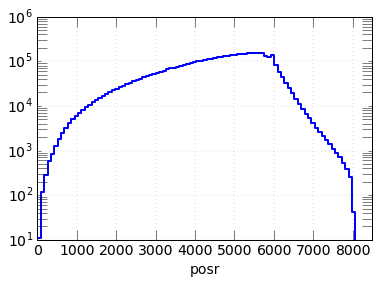

In [40]:
# Plots
my_keys = [['qpdtProbability', [0,1]],
           ['qpdtNhitsEarly', [0,20]],
           ['nhitsCleaned', [0,50]],
           ['itr', [0,1]],
           ['energy', [2.2, 9]],
           ['beta14', [0,1]],
           ['posr', [0, 8500]]
           ]

for one_key, axlim in my_keys:
    ntuple_tools.arrayDiagnostics(all_decay[one_key], one_key,ax_lim=axlim)


Diagnostics TC QPDT Prob
-6.97040120991 0.0 -0.471797319788
Diagnostics Scaled ITR
-4.33969070522 11.3438002882 -0.07001409041


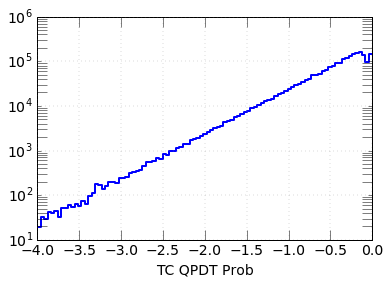

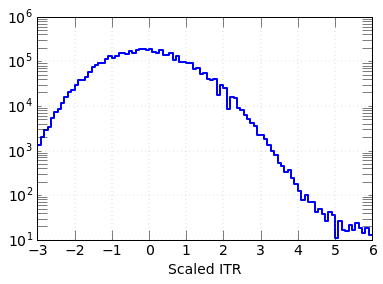

In [41]:
_ = ntuple_tools.arrayDiagnostics(np.log10(all_decay_tcp[all_decay_tcp>0]), 'TC QPDT Prob',ax_lim=[-4,0])
_ = ntuple_tools.arrayDiagnostics(all_decay_sitr, 'Scaled ITR',ax_lim=[-3,6])


In [42]:
qpdt_prob_scale = 0.0143
qpdtqmax = 250.

In [43]:
decay_cuts = ((all_decay['energy']>3.25) *
       #(all_decay['energy']<3.5)*
       (all_decay['beta14']<0.95)*
       (all_decay['beta14']>-0.12)*
       (all_decay['itr']>0.55)*
       (all_decay['posr']<5500.))
print np.sum(decay_cuts)
#scale = len(decay_cuts)*1./np.sum(decay_cuts)
#print scale

poisson_cut = (stats.poisson.pmf(all_decay['qpdtNhitsEarly'], all_decay['nhitsCleaned']*qpdt_prob_scale) > 0.002)
prob_cut = ((1-(1-all_decay['qpdtProbability'])**all_decay['qpdtNhitsEarly']) > 0.01)
nhit_cut = (all_decay['qpdtNhitsEarly']==0)
qmax_cut = (all_decay['qpdtQMax']<qpdtqmax)


# Efficiency of each cut
print 'Poisson', 1.*np.sum(poisson_cut*decay_cuts)/np.sum(decay_cuts)
print 'Probability', 1.*np.sum(prob_cut*decay_cuts)/np.sum(decay_cuts)
print 'Combined', 1.*np.sum(prob_cut*poisson_cut*decay_cuts)/np.sum(decay_cuts)
print 'Nhit', 1.*np.sum(nhit_cut*decay_cuts)/np.sum(decay_cuts)

qpdtcut = qmax_cut+ (poisson_cut*prob_cut)+nhit_cut

#qpdtcut = ((stats.poisson(all_decay['qpdtNhitsEarly'], 
#             all_decay['nhitsCleaned']*qpdt_prob_scale) > 0.002)*
#           (((1-(1-all_decay['qpdtProbability'])**all_decay['qpdtNhitsEarly']) > 0.01) + 
#           (all_decay['qpdtNhitsEarly']==0)))
           



#qpdtcut = all_decay_tcp > 0.01
print 'Events', np.sum(decay_cuts*~qpdtcut)
relerror = np.sqrt(np.sum(decay_cuts*~qpdtcut))/np.sum(decay_cuts*~qpdtcut)
rejected = 100*np.sum(decay_cuts*~qpdtcut)*1./np.sum(decay_cuts)
print 'Rejected fraction', rejected , '+/-', rejected*relerror
scale = np.sum(decay_cuts)*1./np.sum(qpdtcut*decay_cuts)
print scale

3631147
Poisson 0.998393069738
Probability 0.462256967289
Combined 0.460655544928
Nhit 0.53253448566
Events 6500
Rejected fraction 0.179006798678 +/- 0.00222030607637
1.00179327808


In [38]:
xenergy = np.linspace(3.25, 10, 61)
xcenergy = (xenergy[1:] + xenergy[:-1])/2.
xbeta14 = np.linspace(-0.12,0.95, 31)
xradius = np.linspace(0, .8, 31)
rav = 6000.


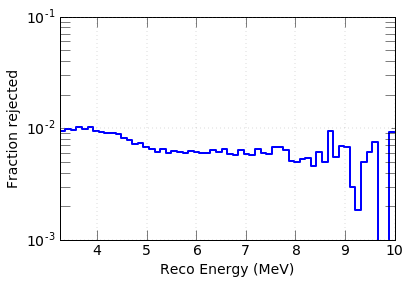

In [20]:
rej_histo,x = np.histogram(all_decay['energy'][decay_cuts*~qpdtcut], xenergy)
all_histo,x = np.histogram(all_decay['energy'][decay_cuts], xenergy)
nocuts,x = np.histogram(all_decay['energy'], xenergy)

jplot.unfilledBar(xenergy, rej_histo*1./all_histo)
#plt.ylim(0, 0.1)
#plt.ylim(0.01, 0.)
plt.yscale('log')
plt.ylabel('Fraction rejected')
plt.xlabel('Reco Energy (MeV)')


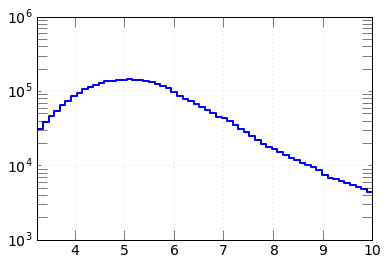

In [11]:
jplot.unfilledBar(xenergy, all_histo)
plt.yscale('log')

/home/jpyanez/python_tools/jp_mpl.py:61: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if rel_error == None:
/cvmfs/soft.computecanada.ca/easybuild/software/2017/avx2/Compiler/intel2016.4/python27-scipy-stack/2017a/lib/python2.7/site-packages/ipykernel/__main__.py:29: RuntimeWarning: invalid value encountered in divide


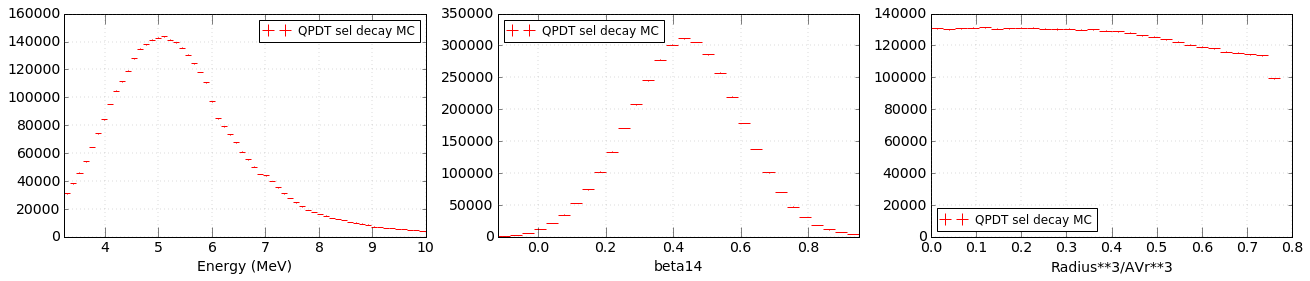

In [12]:
# Reproducing figures 16.12 : Energy, beta14, posr. QPDT selected vs full MC
fig = plt.figure(figsize=(22,4))

ax1 = fig.add_subplot(131)
bfull, x = np.histogram(all_decay['energy'][decay_cuts], xenergy)
bcut, x = np.histogram(all_decay['energy'][decay_cuts *qpdtcut], xenergy)
cuterror = scale*np.sqrt(bcut)/bcut
jplot.errorMark(xenergy, scale*bcut, rel_error = cuterror, color='red',
               label='QPDT sel decay MC')


plt.legend(loc=0)
plt.xlabel('Energy (MeV)')

ax2 = fig.add_subplot(132)
bfull, x = np.histogram(all_decay['beta14'][decay_cuts], xbeta14)
bcut, x = np.histogram(all_decay['beta14'][decay_cuts *qpdtcut], xbeta14)
cuterror = scale*np.sqrt(bcut)/bcut
jplot.errorMark(xbeta14, scale*bcut, rel_error = cuterror, color='red',
                label='QPDT sel decay MC')


plt.legend(loc=0)
plt.xlabel('beta14')

ax3 = fig.add_subplot(133)
bfull, x = np.histogram(all_decay['posr'][decay_cuts]**3/rav**3, xradius)
bcut, x = np.histogram(all_decay['posr'][decay_cuts *qpdtcut]**3/rav**3, xradius)
cuterror = scale*np.sqrt(bcut)/bcut
jplot.errorMark(xradius, scale*bcut, rel_error = cuterror, color='red',
               label='QPDT sel decay MC')


plt.legend(loc=0)
plt.xlabel('Radius**3/AVr**3')

#fig.savefig('/home/jpyanez/snoplus/analysis/water_analysis/qpdt_figures/Fig_16_12_qpdt_full_vs_selected.png', dpi=200)